# Script that perform modelling using different models:
## 1. Näive Bayes
## 2. Full Bayes
## 3. Decision Tree
## 4. Random Forest
## 5. K-Nearest Neighbor

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import OrderedDict
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [2]:
sparse_matrix = pd.read_csv('matrix.csv')

In [3]:
X = sparse_matrix.iloc[:,0:-2]
Y = sparse_matrix.iloc[:, -1]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [5]:
# Naive Bayes
nb = GaussianNB()
                                                    
nb.fit(X_train, Y_train)

# Make predictions on the test set
y_pred = nb.predict(X_test)

# Calculate the accuracy of the classifier
accuracy_nb = accuracy_score(Y_test, y_pred)
print("Accuracy:", round(accuracy_nb, 5))

Accuracy: 0.63


In [17]:
fb = MultinomialNB()

fb.fit(X_train, Y_train)

# Step 5: Make predictions on the test set
y_pred = fb.predict(X_test)

# Step 6: Evaluate the performance of the classifier
accuracy_fb = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy_fb)

Accuracy: 0.82


In [21]:
# Decision Tree
dt = DecisionTreeClassifier(criterion='entropy', random_state=42, splitter='best')

# Train the classifier
dt.fit(X_train, Y_train)

# Make predictions on the test set
y_pred = dt.predict(X_test)

# Calculate the accuracy of the classifier
accuracy_dt = accuracy_score(Y_test, y_pred)
print("Accuracy:", round(accuracy_dt, 5))

Accuracy: 0.94


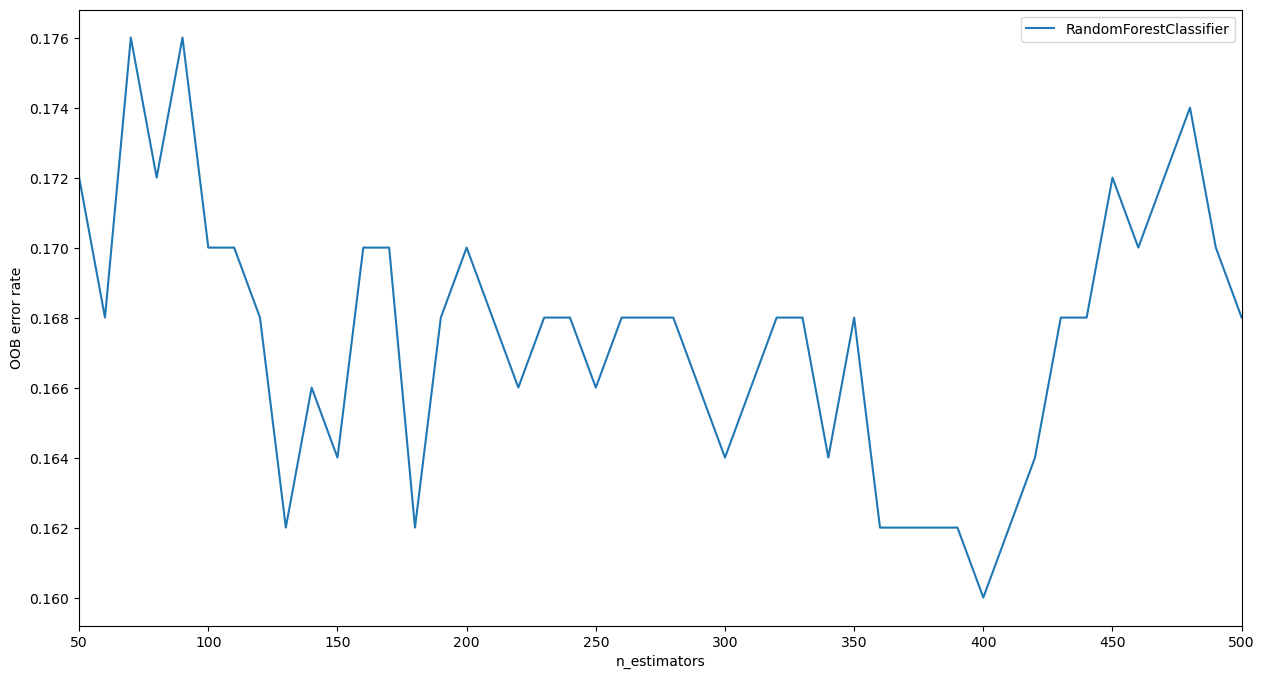

In [83]:
ensemble_rf = [
    ("RandomForestClassifier", RandomForestClassifier(warm_start=True, oob_score=True, random_state=42))
]

error_rate = OrderedDict((label, []) for label, _ in ensemble_rf)


min_estimators = 50
max_estimators = 500

for label, rf in ensemble_rf:
    for i in range(min_estimators, max_estimators + 1, 10):
        rf.set_params(n_estimators=i)
        rf.fit(X, Y)
        oob_error = 1 - rf.oob_score_
        error_rate[label].append((i, oob_error))


for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err) # unzip the tuple with number of trees and OOB error
    plt.figure(figsize=(15,8))
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

In [63]:
# Random Forest
rf = RandomForestClassifier(n_estimators=400, criterion='entropy', warm_start=True, random_state=42)

# Train the classifier
rf.fit(X_train, Y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Calculate the accuracy of the classifier
accuracy_rf = accuracy_score(Y_test, y_pred)
print("Accuracy:", round(accuracy_rf, 5))

Accuracy: 0.84


In [8]:
# Create a KNN classifier
k = 10  # number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)

# Train the classifier
knn.fit(X_train, Y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Calculate the accuracy of the classifier
accuracy_knn = accuracy_score(Y_test, y_pred)
print("Accuracy:", round(accuracy_knn, 5))

Accuracy: 0.82


In [18]:
results = pd.DataFrame({'Model Name' : ['Naive Bayes', 'Full Bayes' ,'Decision Tree', 'Random Forest', 'KNN'], 
                                'Accuracy' : [round(accuracy_nb, 5)*100, round(accuracy_fb, 5)*100 ,round(accuracy_dt, 5)*100, round(accuracy_rf, 5)*100, round(accuracy_knn, 5)*100]})

In [19]:
results

,Model Name,Accuracy
0,Naive Bayes,63.0
1,Full Bayes,82.0
2,Decision Tree,93.0
3,Random Forest,87.0
4,KNN,82.0
